<a href="https://colab.research.google.com/github/min02choi/Style-Color-Detect/blob/main/gradation_calculate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 그라데이션 색상 및 방향 추출

폰트 내부의 그라데이션 정도 계산

구해야 할 것
1. 그라데이션 방향
2. 방향의 양 끝의 RGB값


전제 사항
1. 내부 텍스트에만 그라데이션이 적용 이 아님(str의 테두리에도 가능)
2. 사진은 RGBA 형태

## 코드 흐름
### none
1. 그라데이션 체크
  - 방향 구하기
  - 양 끝의 픽셀 구하기

### str
-

### Api 명세 및 코드 흐름
처음 시작을... - 해당 영역에서 그라데이션 존재 여부가 검출됨

<원본 이미지에서 데이터를 뽑아오는 과정>
1. 해당 영역만 도려냄
2. 해당 영역에서 그라데이션의 방향을 검출함
  1. 이미지 고대비 변환: histo stratch
  2. 엣지 추출
  3. 선의 각도 계산: 허프 변환
3. 그라데이션 영역에서 처음 색과 끝 색을 검출
  1. 내부에 있는 색상 중 거리가 가장 먼 색(유클리드)

<재현하는 과정>
4. 해당 그라데이션 영역을 포함하는 가장 작은 직사각형 그리기
5. 해당 직사각형에 앞서 구한 그라데이션 방향과 처음 색, 끝 색을 적용하여 그라데이션 그리기 엥?
6.


### 그라데이션 이미지에서 색상 코드 값 확인하기
- 픽셀 값의 변화 파악

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

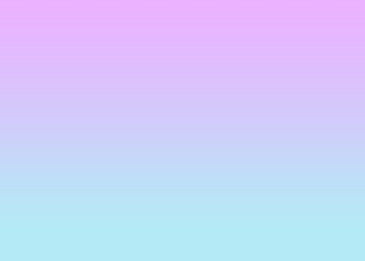

In [ ]:
image = cv2.imread('bg_gradation.jpeg')
cv2_imshow(image)

In [ ]:
image.shape

(261, 365, 3)

In [ ]:
# 수직으로픽셀 값 확인
h = image.shape[0]
w = image.shape[1]

print(h, w)

color_arr = []

for i in range(h - 1):
    color_arr.append(image[i][w // 2])
    print(image[i][w // 2])

261 365
[255 178 235]
[255 178 235]
[255 178 235]
[255 178 235]
[255 178 235]
[255 178 235]
[255 178 235]
[254 177 234]
[254 179 233]
[254 179 233]
[254 179 233]
[254 179 233]
[254 179 233]
[254 179 233]
[254 180 232]
[254 180 232]
[254 180 232]
[254 180 232]
[254 180 232]
[254 180 232]
[255 181 233]
[255 181 233]
[254 181 231]
[254 181 231]
[254 181 231]
[254 181 231]
[255 182 232]
[255 182 232]
[255 183 230]
[255 183 230]
[255 183 230]
[255 183 230]
[255 183 230]
[255 183 229]
[255 183 229]
[255 183 229]
[255 183 229]
[253 184 229]
[255 184 227]
[255 184 227]
[255 184 227]
[255 184 227]
[254 185 228]
[253 185 226]
[253 185 226]
[253 185 226]
[254 186 227]
[254 186 227]
[254 186 227]
[254 186 227]
[254 186 227]
[252 187 226]
[252 187 226]
[254 187 226]
[254 187 226]
[254 187 226]
[252 188 224]
[252 188 224]
[252 188 224]
[252 188 224]
[253 189 224]
[253 189 224]
[253 189 224]
[252 188 223]
[252 188 223]
[253 190 222]
[253 190 222]
[253 190 222]
[253 190 222]
[253 191 221]
[253 191 221

In [ ]:
# 수평으로픽셀 값 확인
h = image.shape[0]
w = image.shape[1]

print(h, w)

for i in range(w - 1):
    print(image[h // 2][i])

261 365
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207]
[250 206 207

In [ ]:
import math
import numpy as np
from PIL import Image, ImageDraw, ImageFont, ImageFilter, ImageEnhance

In [ ]:
def bgr_difference(start, end):
    diff = [-(start[0] - end[0]), -(start[1] - end[1]), -(start[2] - end[2])]
    return diff

(365, 261)
261 365
[-9, 56, -55]
[-0.03448276  0.21455939 -0.21072797]
(261, 365, 4)
[254.96551724 178.21455939 234.78927203]
>>  [255, 178, 235]
[254.93103448 178.42911877 234.57854406]
>>  [255, 178, 235]
[254.89655172 178.64367816 234.36781609]
>>  [255, 179, 234]
[254.86206897 178.85823755 234.15708812]
>>  [255, 179, 234]
[254.82758621 179.07279693 233.94636015]
>>  [255, 179, 234]
[254.79310345 179.28735632 233.73563218]
>>  [255, 179, 234]
[254.75862069 179.50191571 233.52490421]
>>  [255, 180, 234]
[254.72413793 179.7164751  233.31417625]
>>  [255, 180, 233]
[254.68965517 179.93103448 233.10344828]
>>  [255, 180, 233]
[254.65517241 180.14559387 232.89272031]
>>  [255, 180, 233]
[254.62068966 180.36015326 232.68199234]
>>  [255, 180, 233]
[254.5862069  180.57471264 232.47126437]
>>  [255, 181, 232]
[254.55172414 180.78927203 232.2605364 ]
>>  [255, 181, 232]
[254.51724138 181.00383142 232.04980843]
>>  [255, 181, 232]
[254.48275862 181.2183908  231.83908046]
>>  [254, 181, 232]


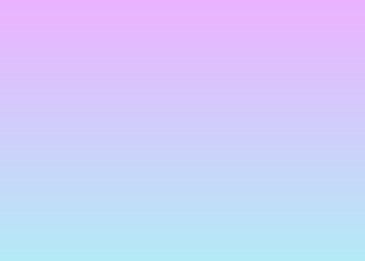

In [ ]:
# 양 끝의 픽셀 값을 기준으로 다시 재현해보기
#
img = Image.new(mode='RGB', size=(365, 261), color=(0, 0, 0))
draw = ImageDraw.Draw(img)

start = [255, 178, 235]
end = [246, 234, 180]

print(img.size)

w = img.size[0]    # 365
h = img.size[1]    # 261

print(h, w)

# 방향 길이에 따라 offset계산
# 방향 길이 구하는 법: 처음 픽셀과 끝 픽셀을 구하면 ... 추후
# 결과가 이상하면 구간으로 잘라서 재현하는 방법도 있음
LENGTH = 261
bgr_diff = bgr_difference(start, end)
print(bgr_diff)
bgr_offset = np.array([m / LENGTH for m in bgr_diff])
print(bgr_offset)

blue = start[0]
green = start[1]
red = start[2]

float_bgr = np.array([float(blue), float(green), float(red)])
# float_bgr = np.array([float(blue), float(green), float(red)])


# Pillow 이미지를 OpenCV 이미지로 변환
open_cv_image = np.array(img)
# OpenCV 이미지를 BGRA 형식으로 변환
open_cv_image = cv2.cvtColor(open_cv_image, cv2.COLOR_RGBA2BGRA)
print(open_cv_image.shape)

# 정수형으로 된다고 가정하면 반올림(round)
for i in range(open_cv_image.shape[0]):
    float_bgr += bgr_offset
    print(float_bgr)
    int_bgr = [round(float_bgr[0]), round(float_bgr[1]), round(float_bgr[2])]
    print(">> ", int_bgr)

    for j in range(open_cv_image.shape[1]):
        # print(int_bgr)
        # print(open_cv_image[i][j])
        open_cv_image[i][j][0] = int_bgr[0]
        open_cv_image[i][j][1] = int_bgr[1]
        open_cv_image[i][j][2] = int_bgr[2]

cv2_imshow(open_cv_image)


시작 색, 끝 색이 주어지면 이들의 평균으로 그림을 그렸을 때 원본이 나온다는 가정이 맞다고 판단됨


이제 완벽하게 재현하기 위해 필요한 매개변수
1. 시작 색
2. 끝 색
3. 방향

### 시작색, 끝색, 방향이 지정되었을 때 그라데이션 그리기
- 방향정보는 단위 벡터로 표시

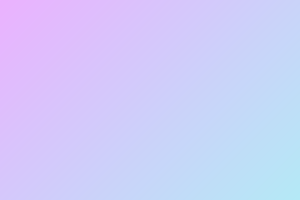

In [ ]:
import numpy as np
from PIL import Image, ImageDraw

# 시작 색과 끝 색
start_color = (255, 0, 0)  # 빨간색
end_color = (0, 0, 255)    # 파란색

start_color = (255, 178, 235)
end_color = (246, 234, 180)

start_color = (235, 178, 255)
end_color = (180, 234, 246)

# 이미지 크기
width = 300
height = 200

# 방향 (단위 벡터로 표현)
direction = np.array([1, 1])  # x축 방향으로 1, y축 방향으로 1

# 이미지 생성
img = Image.new('RGB', (width, height), color=(0, 0, 0))
draw = ImageDraw.Draw(img)

# 시작 색과 끝 색 사이의 보간값 계산하여 이미지에 그라데이션 적용
for x in range(width):
    for y in range(height):
        # 현재 위치에서 시작 색과 끝 색 사이의 보간값 계산
        ratio = (x * direction[0] + y * direction[1]) / (width + height)
        blended_color = tuple(int(start_channel + (end_channel - start_channel) * ratio)
                              for start_channel, end_channel in zip(start_color, end_color))
        # 보간된 색을 이미지에 적용
        draw.point((x, y), fill=blended_color)

# Pillow 이미지를 OpenCV 이미지로 변환
cv_image = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

# 이미지 화면에 표시
cv2_imshow(cv_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


* 그라데이션의 방향을 알 수 있는 방법... 벡터형으로
이거만 하면 다 해결됨

### 선형보간법을 이용한 그라데이션 그리기
1. 그라데이션이 적용된 텍스트 부분을 포함하는 최소 크기의 직사각형을 구함
2. 해당 직사각형의 각 꼭짓점의 좌표와 RGB 값을 구함
3. 유클리드를 이용해서 가장 차이가 많은 두 색을 구함. 이 두 색이 그라데이션의 양 끝 두개의 색
4. 해당 직사각형에 대해서 그림을 그림(선형 보간을 이용)
5. 그라데이션이 적용된 텍스트의 부분만 방금 생성한 이미지에서 픽셀 값을 불러옴(그라데이션 이미지에 해당 텍스트 모양의 마스크를 씌우는 느낌)

### 그라데이션 방향 계산하기
**방법 1**
* 특정 한 픽셀을 잡아서 상하좌우 값을 확인함.

함수 API 설계
getEndColor(): 그라데이션의 양 끝 색의 코드값을 반환하는 함수
* input:
* Output: RGBA코드 값 두개

In [ ]:
def getColorDiff(c1, c2):
    color = (c1[0] - c2[0], c1[1] - c2[1], c1[2] - c2[2])
    return color

In [ ]:
# 방법 1
# 픽셀을 기준으로 상하좌우 픽셀값 왁인, 그 차이로 어쩌고 저쩌고
image = cv2.imread('bg_gradation.jpeg')

a = [100, 100]
b = [200, 200]

location = ["우", "상", "좌", "하"]
dx = [1, 0, -1, 0]
dy = [0, 1, 0. -1]

for i in range(4):
    print(image[a[0]], [a[1]])
    print(location, getColorDiff(image[a[0], a[1]], image[a[0]+dx[i], a[1]+dy[i]]))


[[252 198 215]
 [252 198 215]
 [252 198 215]
 ...
 [252 198 215]
 [252 198 215]
 [252 198 215]] [100]
['우', '상', '좌', '하'] (0, 0, 0)
[[252 198 215]
 [252 198 215]
 [252 198 215]
 ...
 [252 198 215]
 [252 198 215]
 [252 198 215]] [100]
['우', '상', '좌', '하'] (0, 0, 0)
[[252 198 215]
 [252 198 215]
 [252 198 215]
 ...
 [252 198 215]
 [252 198 215]
 [252 198 215]] [100]


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
image = cv2.imread('bg_gradation.jpeg')

print(image.shape)

a = [100, 100]
b = [200, 200]

print(image[100][100])
print(image[100][95])
print(image[100][105])
print(image[95][100])
print(image[105][100])

(261, 365, 3)
[252 198 215]
[252 198 215]
[252 198 215]
[252 197 216]
[250 199 213]


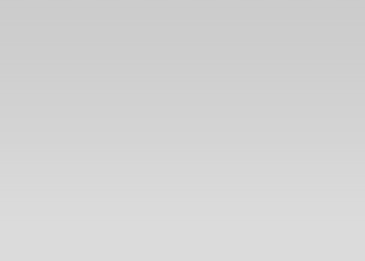

Gradient Direction: 5156


In [ ]:
import cv2
import numpy as np

def detect_gradient_direction(image_path):
    # 이미지 읽기
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    cv2_imshow(img)

    # 이미지의 그라데이션 계산
    grad_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

    # 각 픽셀의 그라데이션의 크기와 방향 계산
    gradient_magnitude, gradient_angle = cv2.cartToPolar(grad_x, grad_y, angleInDegrees=True)

    # 그라데이션 방향에 대한 히스토그램 계산
    bins = np.int32((gradient_angle * 180) / np.pi)
    hist = np.bincount(bins.ravel(), gradient_magnitude.ravel(), minlength=180)

    # 히스토그램에서 최대 값을 찾아서 그라데이션 방향 결정
    dominant_angle = np.argmax(hist)

    return dominant_angle

# 이미지 경로 설정
image_path = 'bg_gradation.jpeg'

# 그라데이션 방향 검출
direction = detect_gradient_direction(image_path)
print("Gradient Direction:", direction)

차이가 명확하지 않아서 히스토그램 스트레칭 진행

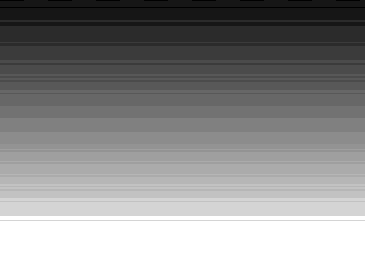

In [ ]:
import cv2

# 이미지 경로 설정
image_path = 'bg_gradation.jpeg'
# image_path = '45angle.png'

# 이미지 읽기
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# 히스토그램 평활화 적용
equalized_img = cv2.equalizeHist(img)
cv2_imshow(equalized_img)

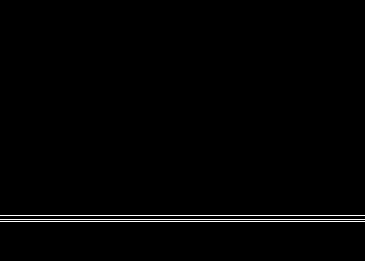

Detected line angles: [90.00000250447816, 90.00000250447816, 90.00000250447816, 89.00000133828577, 90.99999684048139]


In [ ]:
import cv2
import numpy as np

def detect_lines(gray_image):
    # 이미지 읽기
    # img = cv2.imread(image_path)
    gray = gray_image

    # 가장자리 검출
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)
    cv2_imshow(edges)

    # 허프 변환을 사용하여 선 감지
    lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold=100)

    # 각도 계산
    angles = []
    if lines is not None:
        for line in lines:
            rho, theta = line[0]
            angle = theta * 180 / np.pi
            angles.append(angle)

    return angles

# 이미지 경로 설정
image_path = equalized_img

# 선의 각도 검출
angles = detect_lines(image_path)
print("Detected line angles:", angles)


## Final

### Api 명세 및 코드 흐름
처음 시작을... - 해당 영역에서 그라데이션 존재 여부가 검출됨

<원본 이미지에서 데이터를 뽑아오는 과정>
1. 해당 영역만 도려냄
2. 해당 영역에서 그라데이션의 방향을 검출함
  1. 이미지 고대비 변환: histo stratch
  2. 엣지 추출
  3. 선의 각도 계산: 허프 변환
3. 그라데이션 영역에서 처음 색과 끝 색을 검출
  1. 내부에 있는 색상 중 거리가 가장 먼 색(유클리드)

<재현하는 과정>
4. 해당 그라데이션 영역을 포함하는 가장 작은 직사각형 그리기
5. 해당 직사각형에 앞서 구한 그라데이션 방향과 처음 색, 끝 색을 적용하여 그라데이션 그리기 엥?
6.


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
# 그라데이션이 적용된 영역을 반환
def getGradationPart(image, num):
    hist = []
    # 각 픽셀의 화소값
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            hist.append(tuple(image[i, j]))

    # 픽셀 색상별 등장 횟수 계산
    color_counts = {}
    for color in hist:
        if color in color_counts:
            color_counts[color] += 1
        else:
            color_counts[color] = 1

    sorted_colors = sorted(color_counts.items(), key=lambda x: x[1], reverse=True)
    print(sorted_colors)

    # 명확한 색 판별
    # 자르는 임계 선이 필요할 듯
    color_list = []
    for i in range(len(sorted_colors)):
        if (sorted_colors[i][0][3] == 0):
            pass
        elif (sorted_colors[i][1] > sorted_colors[i+1][1] * 3):
            color_list.append(sorted_colors[i])
            break

    print(color_list)

    # 빈 이미지 생성 (모든 픽셀이 0으로 초기화된 배열)

    label_image = image.copy()
    only_grad_image = image.copy()

    # "그라데이션이 아님"이 명확한 부분은 (0, 0, 0, 0)으로 변환
    # 알파 값이 0인 부분, 앞서 구한 빈도 수 높은 색인 경우
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # print(image[i][j])
            if image[i][j][3] == 0:
                label_image[i][j] = (0, 0, 0, 0)
                only_grad_image[i][j] = (0, 0, 0, 0)
            # elif (image[i][j][0:3] in color_list[0][0:3]):
            elif (np.all(image[i][j][0:3] == [255, 255, 255])):   # 이 부분 수정 필요
                label_image[i][j] = (0, 0, 0, 0)
                only_grad_image[i][j] = (0, 0, 0, 0)
            else:
                label_image[i][j] = (0, 0, 0, 255)

    return label_image, only_grad_image


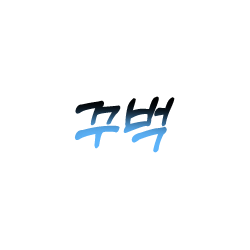

[((255, 255, 255, 0), 55415), ((0, 0, 0, 0), 2491), ((255, 255, 255, 255), 1406), ((255, 255, 255, 228), 77), ((251, 180, 93, 255), 44), ((255, 255, 255, 127), 39), ((255, 255, 255, 213), 37), ((255, 255, 255, 142), 34), ((255, 255, 255, 23), 31), ((255, 255, 255, 170), 30), ((255, 255, 255, 1), 28), ((255, 255, 255, 11), 28), ((255, 255, 255, 47), 25), ((32, 23, 12, 255), 25), ((255, 255, 255, 95), 24), ((255, 255, 255, 29), 22), ((255, 255, 255, 158), 22), ((255, 255, 255, 233), 22), ((255, 255, 255, 2), 21), ((255, 255, 255, 5), 21), ((255, 255, 255, 185), 20), ((255, 255, 255, 71), 20), ((233, 167, 86, 255), 19), ((243, 174, 90, 255), 19), ((244, 175, 90, 255), 19), ((255, 255, 255, 244), 18), ((255, 255, 255, 65), 17), ((255, 255, 255, 59), 17), ((255, 255, 255, 199), 17), ((240, 172, 89, 255), 17), ((255, 255, 255, 17), 16), ((26, 19, 10, 255), 16), ((255, 255, 255, 212), 15), ((255, 255, 255, 31), 14), ((255, 255, 255, 35), 14), ((7, 5, 3, 255), 14), ((237, 170, 88, 255), 14), (

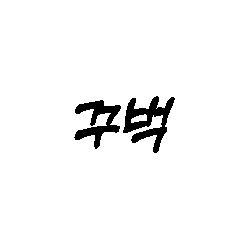

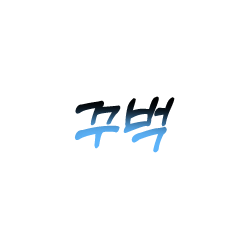

In [ ]:
# 해당 영역을 도려내는 법
# 픽셀을 카운트 하여 가장 많은 (동일한) 픽셀이 등장하는 픽셀은 제거함
CUR_STYLE = 2

IMAGE_PATH = 'text_gradation.png'

original_image = cv2.imread(IMAGE_PATH, cv2.IMREAD_UNCHANGED)
cv2_imshow(original_image)

# 그라데이션이 적용된 영역의 이미지(레이블 이미지)
label_image, only_grad_image = getGradationPart(original_image, CUR_STYLE)
cv2_imshow(label_image)
cv2_imshow(only_grad_image)

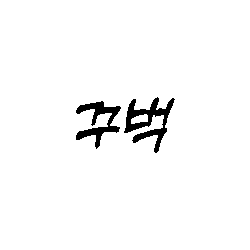

In [ ]:
# 이미지 가장자리의 노이즈를 없애기 위해 침식 작용 - 사용 여부 추후 고민
kernel = np.ones((2,2),np.uint8)

# 이미지 침식 수행
eroded_image = cv2.erode(label_image, kernel, iterations = 1)
cv2_imshow(eroded_image)

In [ ]:
# 그라데이션 영역의 이미지를 읽어서 해당 부분을 회색조로 변환하고, 이를 스트레칭함
# eroded_image로 한번 해보고, label_image로 한번 해 볼것
def histoGrayStrach(original_image, only_grad_image, eroded_image):

    # 노이즈 감소를 위해 침식을 한번 진행
    only_grad_image = cv2.erode(only_grad_image, kernel, iterations = 1)

    # gray_img = cv2.imread(only_grad_image, cv2.IMREAD_GRAYSCALE)
    gray_image = cv2.cvtColor(only_grad_image, cv2.COLOR_BGR2GRAY)
    cv2_imshow(gray_image)

    # 히스토그램 평활화 적용
    equalized_img = cv2.equalizeHist(gray_image)
    cv2_imshow(equalized_img)
    return equalized_img

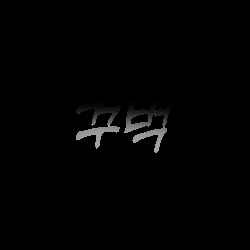

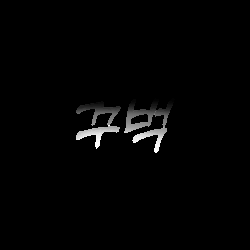

In [ ]:
gray_scaled_image = histoGrayStrach(original_image, only_grad_image, eroded_image)

In [ ]:
def detect_lines(gray_scaled_image):
    # 가장자리 검출
    edges = cv2.Canny(gray_scaled_image, 50, 150, apertureSize=3)
    cv2_imshow(edges)

    # 허프 변환을 사용하여 선 감지
    lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold=100)

    # 각도 계산
    angles = []
    if lines is not None:
        for line in lines:
            rho, theta = line[0]
            angle = theta * 180 / np.pi
            angles.append(angle)

    return angles

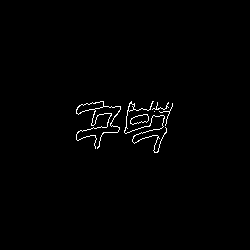

(250, 250)


In [ ]:
detect_lines(gray_scaled_image)
print(gray_scaled_image.shape)

### 일단 여기서 중단 (24.04.09 am3:05)
* 문제점: 배경과 텍스트의 가장자리를 엣지로 인식하는거 같음
* 이미지의 색갈을 보간법으로 늘릴 수 있는 방법이 있나? 만약 이게 된다면 페이지를 전체 칠한 뒤에 거기서 허프만 알고리즘으로 각도를 구해도 될 거 같은데...

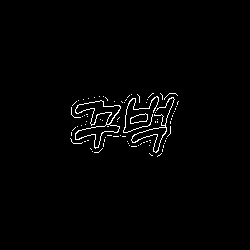

In [ ]:
import cv2
import numpy as np

# 이미지 읽기 (알파 채널 포함)
image = cv2.imread('text_gradation.png', cv2.IMREAD_UNCHANGED)

# 알파 채널을 확인하여 투명한 영역을 무시하는 마스크 생성
mask = np.uint8(image[:,:,3] > 0)

# 이미지를 그레이스케일로 변환
gray_image = cv2.cvtColor(image, cv2.COLOR_BGRA2GRAY)

# 엣지 검출 수행
edges = cv2.Canny(gray_image, 100, 200)

# 투명한 영역을 제외한 엣지만 남기도록 마스크 적용
edges = cv2.bitwise_and(edges, edges, mask=mask)

# 결과 출력
cv2_imshow(edges)
cv2.waitKey(0)
cv2.destroyAllWindows()
